In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [209]:
def skip_row(n):
    all_numbers = list(range(1, n))  
    start = 1
    end = n
    batch_size = 100
    interval = 11
    generated_numbers = []

    while start <= end:
        batch = list(range(start, start + batch_size))
        generated_numbers.extend(batch)
        start += batch_size + interval

    # Remove the generated_numbers from the all_numbers list
    for num in generated_numbers:
        all_numbers.remove(num)
    return all_numbers


In [210]:
all_numbers = skip_row(18527)
df = pd.read_csv('spirometer_normal.csv', skiprows=all_numbers)

In [211]:
df.shape

(16700, 1)

In [212]:
# Calculate the number of data points for the first 15 seconds (15 seconds * 1000 Hz)
data_points = 15 * 1000

# Extract the first 60 seconds of data
data_subset = df.iloc[:data_points, :]

# Calculate minimum, maximum, and median for both columns
min_vol = np.min(data_subset['Voltage'])
max_vol = np.max(data_subset['Voltage'])
median_vol = np.median(data_subset['Voltage'])

# Print the results
print("Statistics for flow rate:")
print(f"Minimum: {min_vol}")
print(f"Maximum: {max_vol}")
print(f"Median: {median_vol}\n")

Statistics for flow rate:
Minimum: 2.428604
Maximum: 2.664542
Median: 2.525461



In [213]:
print(data_subset.shape)
print(df.shape)

(15000, 1)
(16700, 1)


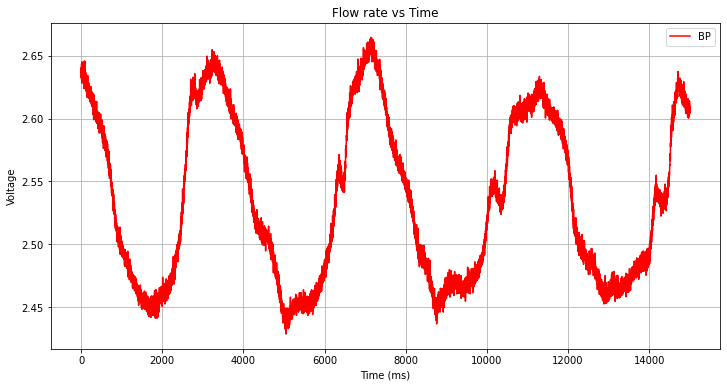

In [214]:
plt.figure(figsize=(12, 6))
plt.plot(data_subset['Voltage'], label='BP', color='red')
plt.title('Flow rate vs Time')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [215]:
# Calibration values
slope = 7.8
intercept = -19.78

# Function to calculate blood pressure
def calculate_flow_rate(voltage):
    return slope * voltage + intercept

In [216]:
data_subset.loc[:,'flow_rate'] = data_subset['Voltage'].apply(calculate_flow_rate)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [217]:
data_subset.shape

(15000, 2)

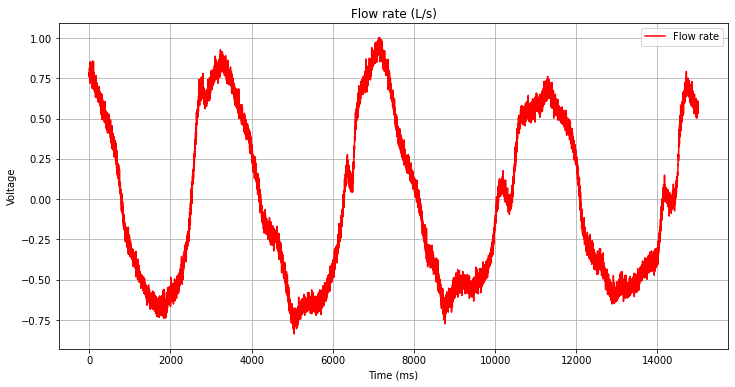

In [234]:
plt.figure(figsize=(12, 6))
plt.plot(data_subset['flow_rate'], label='Flow rate', color='red')
plt.title('Flow rate (L/s)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [219]:
data_subset.shape

(15000, 2)

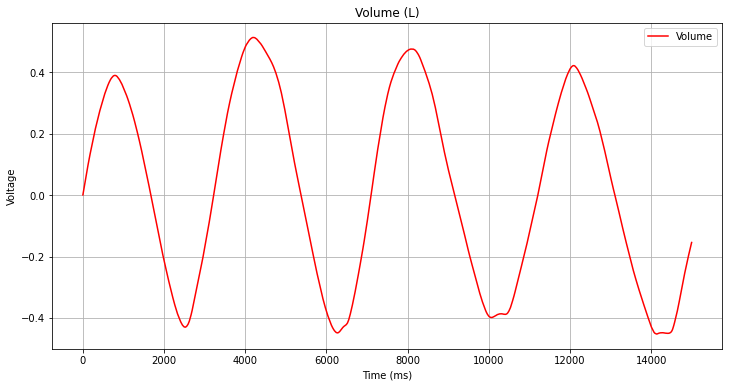

In [252]:
# Extract flow rate values and time index
flow_rate_values = data_subset['flow_rate'].values

# Calculate the cumulative sum to get the volume
volume = (np.cumsum(flow_rate_values))/1000

plt.figure(figsize=(12, 6))
plt.plot(volume, label='Volume', color='red')
plt.title('Volume (L)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()


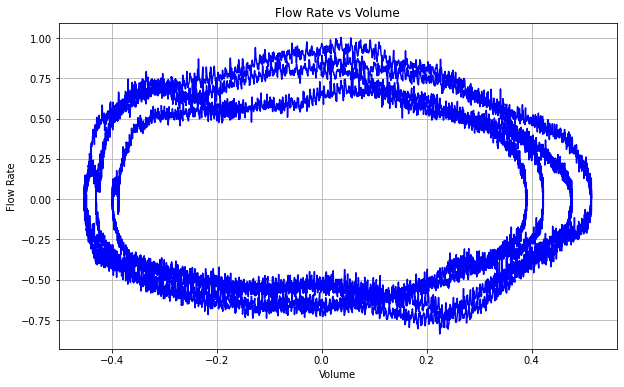

In [253]:
# Plot flow rate vs volume
plt.figure(figsize=(10, 6))
plt.plot(volume, flow_rate_values, linestyle='-', color='b')
plt.title('Flow Rate vs Volume')
plt.xlabel('Volume')
plt.ylabel('Flow Rate')
plt.grid(True)
plt.show()

In [254]:
# Calculate respiratory volumes
tidal_volume = 25*np.mean(volume)
inspiratory_reserve_volume = 7*np.max(volume) - tidal_volume
expiratory_reserve_volume = abs(np.min(volume))*2
vital_capacity = inspiratory_reserve_volume + tidal_volume + np.abs(expiratory_reserve_volume)

print(f'Tidal Volume: {tidal_volume} L')
print(f'Inspiratory Reserve Volume: {inspiratory_reserve_volume} L')
print(f'Expiratory Reserve Volume: {expiratory_reserve_volume} L')
print(f'Vital Capacity: {vital_capacity} L')

Tidal Volume: 0.400802136698721 L
Inspiratory Reserve Volume: 3.1960303249012427 L
Expiratory Reserve Volume: 0.9049529720000439 L
Vital Capacity: 4.501785433600007 L
